In [2]:
from flask import Flask, render_template
import pymongo
from splinter import Browser
from bs4 import BeautifulSoup
import os
from datetime import datetime
import platform
import pdb
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
# GET PHASES
def init_browser():
    if platform.system().lower() == 'windows'.lower():
        executable_path = {
            'executable_path': 
            os.path.join(os.getcwd(), 'chromedriver.exe')}
        return Browser('chrome', **executable_path, headless=False)
    else:
        return Browser('chrome')
    
def get_html(browser, url = "https://marvelcinematicuniverse.fandom.com/wiki/Marvel_Cinematic_Universe_Wiki"):
    browser.visit(url)
    html = browser.html
    return html

def get_listings(html):
    
    soup = BeautifulSoup(html, "html.parser")
    listings = [a.text for a in soup.find_all('a', class_='wds-dropdown-level-2__toggle') if a]
    return listings
    
def scrape(browser, url):
   
    html = get_html(browser, url)
    listings = get_listings(html)
    return listings


def main():
        browser = init_browser()
        url='https://marvelcinematicuniverse.fandom.com/wiki/Marvel_Cinematic_Universe_Wiki'
        titles=scrape(browser, url)
        phaselist = titles
        return phaselist

phaselistall = main()



In [4]:
phaselist2 = phaselistall[5:8]
phaselist = [i[1:-2] for i in phaselist2]
phaselist = [i.replace(" ", "_") for i in phaselist]
phaselist

['Phase_One', 'Phase_Two', 'Phase_Three']

In [5]:
def init_browser():
    if platform.system().lower() == 'windows'.lower():
        executable_path = {
            'executable_path': 
            os.path.join(os.getcwd(), 'chromedriver.exe')}
        return Browser('chrome', **executable_path, headless=False)
    else:
        return Browser('chrome')
    
def get_html(browser, url):
    browser.visit(url)
    html = browser.html
    return html

def get_listings(html):
    soup = BeautifulSoup(html, "html.parser")
    listings = [a.get('href') for a in (i.find('a',href = True) for i in soup.find_all('span', class_='mw-headline')if i) if a]
    return listings

def scrape(browser, url):
    html = get_html(browser, url)
    listings = get_listings(html)
    return listings

def scrape_many(search_terms = phaselist, browser = init_browser(), base_url = "https://marvelcinematicuniverse.fandom.com/"):
    links = []
    phase = []
    for search_term in search_terms:
        url = base_url + search_term
        titles = scrape(browser, url)
        links = links + titles
        phase = phase + [search_term for i in titles]

    return links, phase
        
links, phase = scrape_many()        


In [6]:
movielinks = dict(zip(links, phase))
movielinks

{'/wiki/Iron_Man_(film)': 'Phase_One',
 '/wiki/The_Incredible_Hulk': 'Phase_One',
 '/wiki/Iron_Man_2': 'Phase_One',
 '/wiki/Thor_(film)': 'Phase_One',
 '/wiki/Captain_America:_The_First_Avenger': 'Phase_One',
 '/wiki/The_Avengers': 'Phase_One',
 '/wiki/Iron_Man_3': 'Phase_Two',
 '/wiki/Thor:_The_Dark_World': 'Phase_Two',
 '/wiki/Captain_America:_The_Winter_Soldier': 'Phase_Two',
 '/wiki/Guardians_of_the_Galaxy_(film)': 'Phase_Two',
 '/wiki/Avengers:_Age_of_Ultron': 'Phase_Two',
 '/wiki/Ant-Man_(film)': 'Phase_Two',
 '/wiki/Captain_America:_Civil_War': 'Phase_Three',
 '/wiki/Doctor_Strange_(film)': 'Phase_Three',
 '/wiki/Guardians_of_the_Galaxy_Vol._2': 'Phase_Three',
 '/wiki/Spider-Man:_Homecoming': 'Phase_Three',
 '/wiki/Thor:_Ragnarok': 'Phase_Three',
 '/wiki/Black_Panther_(film)': 'Phase_Three',
 '/wiki/Avengers:_Infinity_War': 'Phase_Three',
 '/wiki/Ant-Man_and_the_Wasp': 'Phase_Three',
 '/wiki/Captain_Marvel_(film)': 'Phase_Three',
 '/wiki/Avengers:_Endgame': 'Phase_Three',
 '/wik

In [7]:
mv_id1 = [a[6:] for a in links]
for x in mv_id1:
    x = x.replace('_(film)', "")
    
mv_id2 = [a.replace('_(film)', "") for a in mv_id1]
fandom_movie_titles = [a.replace("_"," ") for a in mv_id2]
fandom_movie_titles

['Iron Man',
 'The Incredible Hulk',
 'Iron Man 2',
 'Thor',
 'Captain America: The First Avenger',
 'The Avengers',
 'Iron Man 3',
 'Thor: The Dark World',
 'Captain America: The Winter Soldier',
 'Guardians of the Galaxy',
 'Avengers: Age of Ultron',
 'Ant-Man',
 'Captain America: Civil War',
 'Doctor Strange',
 'Guardians of the Galaxy Vol. 2',
 'Spider-Man: Homecoming',
 'Thor: Ragnarok',
 'Black Panther',
 'Avengers: Infinity War',
 'Ant-Man and the Wasp',
 'Captain Marvel',
 'Avengers: Endgame',
 'Spider-Man: Far From Home']

In [8]:
fandom_phaselist = [a.replace("_"," ") for a in phase]
fandom_phaselist

['Phase One',
 'Phase One',
 'Phase One',
 'Phase One',
 'Phase One',
 'Phase One',
 'Phase Two',
 'Phase Two',
 'Phase Two',
 'Phase Two',
 'Phase Two',
 'Phase Two',
 'Phase Three',
 'Phase Three',
 'Phase Three',
 'Phase Three',
 'Phase Three',
 'Phase Three',
 'Phase Three',
 'Phase Three',
 'Phase Three',
 'Phase Three',
 'Phase Three']

In [114]:
phase_df = pd.DataFrame( {"Movie ID": fandom_movie_titles,"Phase": fandom_phaselist})
phase_df

,Movie ID,Phase
0,Iron Man,Phase One
1,The Incredible Hulk,Phase One
2,Iron Man 2,Phase One
3,Thor,Phase One
4,Captain America: The First Avenger,Phase One
5,The Avengers,Phase One
6,Iron Man 3,Phase Two
7,Thor: The Dark World,Phase Two
8,Captain America: The Winter Soldier,Phase Two
9,Guardians of the Galaxy,Phase Two


In [116]:
import pandas as pd
mcu_df = pd.read_csv('kaggle_mcu.csv')
mcu_df["Movie ID"] = [x[:-14] for x in mcu_df['Title']]
mcu_df.columns
organized_df = mcu_df[['Movie ID','Uniq Id', 'Crawl Timestamp', 'Pageurl', 'Title', 'Genres',
       'Release Date', 'Movie Rating', 'Review Rating', 'Movie Run Time',
       'Plot', 'Cast', 'Language', 'Filming Locations', 'Budget', 'Collection',
       'Collection Date']]
organized_df



,Movie ID,Uniq Id,Crawl Timestamp,Pageurl,Title,Genres,Release Date,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Collection,Collection Date
0,Guardians of the Galaxy Vol. 3,bdce103d6c8ee8206477f5ef43cdd6cf,2019-05-29 12:32:00 +0000,https://www.imdb.com/title/tt6791350/,Guardians of the Galaxy Vol. 3 (2021) - IMDb,NaN,NaN,NaN,NaN,NaN,Directed by James Gunn. With Elizabeth Debicki...,NaN,English,NaN,NaN,NaN,NaN
1,Iron Man 2,90bd11174adf73475d088f93a2da28da,2019-05-29 12:30:33 +0000,https://www.imdb.com/title/tt1228705/,Iron Man 2 (2010) - IMDb,Action|Adventure|Sci-Fi,7 May 2010 (USA),PG-13,7.0,124 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Mickey Rourke|Gwyneth Paltro...,English|French|Russian,"D.C. Stages, 1360 East 6th Street, Downtown, L...","$200,000,000","$623,933,331,",19 August 2010
2,Guardians of the Galaxy,df6fc7d029a7e5c214509cbfb513d283,2019-05-29 12:31:05 +0000,https://www.imdb.com/title/tt2015381/,Guardians of the Galaxy (2014) - IMDb,Action|Adventure|Comedy|Sci-Fi,1 August 2014 (USA),PG-13,8.1,121 min,"Directed by James Gunn. With Chris Pratt, Vin ...",Chris Pratt|Vin Diesel|Bradley Cooper|Zoe Saldana,English,"Shepperton Studios, Shepperton, Surrey, Englan...","$170,000,000","$774,176,600",NaN
3,Black Panther,4f73f64a1b559ac76448fd9347bca974,2019-05-29 12:31:37 +0000,https://www.imdb.com/title/tt1825683/,Black Panther (2018) - IMDb,Action|Adventure|Sci-Fi,16 February 2018 (USA),PG-13,7.3,134 min,Directed by Ryan Coogler. With Chadwick Bosema...,Chadwick Boseman|Michael B. Jordan|Lupita Nyon...,English|Swahili|Nama|Xhosa|Korean,"Pinewood Atlanta Studios, 461 Sandy Creek Road...","$200,000,000","$1,347,071,259",NaN
4,Iron Man 3,35ced81a516bc02c3f303015cb7a068f,2019-05-29 12:30:49 +0000,https://www.imdb.com/title/tt1300854/,Iron Man 3 (2013) - IMDb,Action|Adventure|Sci-Fi,3 May 2013 (USA),PG-13,7.2,130 min,Directed by Shane Black. With Robert Downey Jr...,Robert Downey Jr.|Guy Pearce|Gwyneth Paltrow|D...,English,"Cary, North Carolina, USA","$200,000,000","$1,215,439,994",NaN
5,The Incredible Hulk,1b678fd492c4e7e9670d9821771d4969,2019-05-29 12:30:25 +0000,https://www.imdb.com/title/tt0800080/,The Incredible Hulk (2008) - IMDb,Action|Adventure|Sci-Fi,13 June 2008 (USA),PG-13,6.7,112 min,Directed by Louis Leterrier. With Edward Norto...,Edward Norton|Liv Tyler|Tim Roth|William Hurt,English|Portuguese|Spanish,"Cherry Street Bridge, Toronto, Ontario, Canada","$150,000,000","$263,427,551",NaN
6,Captain Marvel,430d1d4ab49d0606c260e17b0dc0bb93,2019-05-29 12:31:49 +0000,https://www.imdb.com/title/tt4154664/,Captain Marvel (2019) - IMDb,Action|Adventure|Sci-Fi,8 March 2019 (USA),PG-13,7.1,123 min,"Directed by Anna Boden, Ryan Fleck. With Brie ...",Brie Larson|Samuel L. Jackson|Ben Mendelsohn|J...,English,"Los Angeles, California, USA",NaN,"$1,126,318,317,",20 May 2019
7,Iron Man,c71e93e0f4eb6e5cd73137f051262007,2019-05-29 12:30:21 +0000,https://www.imdb.com/title/tt0371746/,Iron Man (2008) - IMDb,Action|Adventure|Sci-Fi,2 May 2008 (USA),PG-13,7.9,126 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Gwyneth Paltrow|Terrence How...,English|Persian|Urdu|Arabic|Hungarian,"Palmdale Regional Airport, Palmdale, Californi...","$140,000,000","$585,174,222,",2 October 2008
8,Thor,f59d540280f7a915c1823908ff695e14,2019-05-29 12:30:38 +0000,https://www.imdb.com/title/tt0800369/,Thor (2011) - IMDb,Action|Adventure|Fantasy|Sci-Fi,6 May 2011 (USA),PG-13,7.0,115 min,Directed by Kenneth Branagh. With Chris Hemswo...,Chris Hemsworth|Anthony Hopkins|Natalie Portma...,English,"Galisteo, New Mexico, USA","$150,000,000","$449,326,618",NaN
9,Captain America: Civil War,26f5c6056bfbbfe50d427cd97845c899,2019-05-29 12:31:19 +0000,https://www.imdb.com/title/tt3498820/,Captain America: Civil War (2016) - IMDb,Action|Adventure|Sci-Fi,6 May 2016 (USA),PG-13,7.8,147 min,"Directed by Anthony Russo, Joe Russo. With Chr...",Chris Evans|Robert Downey Jr.|Scarlett Johanss..

In [117]:
combined_df = pd.merge(organized_df, phase_df, on="Movie ID")
combined_df = combined_df[['Movie ID','Phase','Uniq Id', 'Crawl Timestamp', 'Pageurl', 'Title', 'Genres',
       'Release Date', 'Movie Rating', 'Review Rating', 'Movie Run Time',
       'Plot', 'Cast', 'Language', 'Filming Locations', 'Budget', 'Collection',
       'Collection Date']]
combined_df

,Movie ID,Phase,Uniq Id,Crawl Timestamp,Pageurl,Title,Genres,Release Date,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Collection,Collection Date
0,Iron Man 2,Phase One,90bd11174adf73475d088f93a2da28da,2019-05-29 12:30:33 +0000,https://www.imdb.com/title/tt1228705/,Iron Man 2 (2010) - IMDb,Action|Adventure|Sci-Fi,7 May 2010 (USA),PG-13,7.0,124 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Mickey Rourke|Gwyneth Paltro...,English|French|Russian,"D.C. Stages, 1360 East 6th Street, Downtown, L...","$200,000,000","$623,933,331,",19 August 2010
1,Guardians of the Galaxy,Phase Two,df6fc7d029a7e5c214509cbfb513d283,2019-05-29 12:31:05 +0000,https://www.imdb.com/title/tt2015381/,Guardians of the Galaxy (2014) - IMDb,Action|Adventure|Comedy|Sci-Fi,1 August 2014 (USA),PG-13,8.1,121 min,"Directed by James Gunn. With Chris Pratt, Vin ...",Chris Pratt|Vin Diesel|Bradley Cooper|Zoe Saldana,English,"Shepperton Studios, Shepperton, Surrey, Englan...","$170,000,000","$774,176,600",NaN
2,Black Panther,Phase Three,4f73f64a1b559ac76448fd9347bca974,2019-05-29 12:31:37 +0000,https://www.imdb.com/title/tt1825683/,Black Panther (2018) - IMDb,Action|Adventure|Sci-Fi,16 February 2018 (USA),PG-13,7.3,134 min,Directed by Ryan Coogler. With Chadwick Bosema...,Chadwick Boseman|Michael B. Jordan|Lupita Nyon...,English|Swahili|Nama|Xhosa|Korean,"Pinewood Atlanta Studios, 461 Sandy Creek Road...","$200,000,000","$1,347,071,259",NaN
3,Iron Man 3,Phase Two,35ced81a516bc02c3f303015cb7a068f,2019-05-29 12:30:49 +0000,https://www.imdb.com/title/tt1300854/,Iron Man 3 (2013) - IMDb,Action|Adventure|Sci-Fi,3 May 2013 (USA),PG-13,7.2,130 min,Directed by Shane Black. With Robert Downey Jr...,Robert Downey Jr.|Guy Pearce|Gwyneth Paltrow|D...,English,"Cary, North Carolina, USA","$200,000,000","$1,215,439,994",NaN
4,The Incredible Hulk,Phase One,1b678fd492c4e7e9670d9821771d4969,2019-05-29 12:30:25 +0000,https://www.imdb.com/title/tt0800080/,The Incredible Hulk (2008) - IMDb,Action|Adventure|Sci-Fi,13 June 2008 (USA),PG-13,6.7,112 min,Directed by Louis Leterrier. With Edward Norto...,Edward Norton|Liv Tyler|Tim Roth|William Hurt,English|Portuguese|Spanish,"Cherry Street Bridge, Toronto, Ontario, Canada","$150,000,000","$263,427,551",NaN
5,Captain Marvel,Phase Three,430d1d4ab49d0606c260e17b0dc0bb93,2019-05-29 12:31:49 +0000,https://www.imdb.com/title/tt4154664/,Captain Marvel (2019) - IMDb,Action|Adventure|Sci-Fi,8 March 2019 (USA),PG-13,7.1,123 min,"Directed by Anna Boden, Ryan Fleck. With Brie ...",Brie Larson|Samuel L. Jackson|Ben Mendelsohn|J...,English,"Los Angeles, California, USA",NaN,"$1,126,318,317,",20 May 2019
6,Iron Man,Phase One,c71e93e0f4eb6e5cd73137f051262007,2019-05-29 12:30:21 +0000,https://www.imdb.com/title/tt0371746/,Iron Man (2008) - IMDb,Action|Adventure|Sci-Fi,2 May 2008 (USA),PG-13,7.9,126 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Gwyneth Paltrow|Terrence How...,English|Persian|Urdu|Arabic|Hungarian,"Palmdale Regional Airport, Palmdale, Californi...","$140,000,000","$585,174,222,",2 October 2008
7,Thor,Phase One,f59d540280f7a915c1823908ff695e14,2019-05-29 12:30:38 +0000,https://www.imdb.com/title/tt0800369/,Thor (2011) - IMDb,Action|Adventure|Fantasy|Sci-Fi,6 May 2011 (USA),PG-13,7.0,115 min,Directed by Kenneth Branagh. With Chris Hemswo...,Chris Hemsworth|Anthony Hopkins|Natalie Portma...,English,"Galisteo, New Mexico, USA","$150,000,000","$449,326,618",NaN
8,Captain America: Civil War,Phase Three,26f5c6056bfbbfe50d427cd97845c899,2019-05-29 12:31:19 +0000,https://www.imdb.com/title/tt3498820/,Captain America: Civil War (2016) - IMDb,Action|Adventure|Sci-Fi,6 May 2016 (USA),PG-13,7.8,147 min,"Directed by Anthony Russo, Joe Russo. With Chr...",Chris Evans|Robert Downey Jr.|Scarlett Johanss...,English|German|Xhosa|Russian|Romanian|Hindi,"Atlanta, Georgia, USA","$250,000,000","$1,153,304,495",NaN
9,Avengers: Infinity War,Phase Three,ba4864cd7af4a074c686d50b10d2

In [119]:
combined_df=combined_df[["Movie ID","Phase","Title","Review Rating","Release Date","Budget","Collection"]]
combined_df

,Movie ID,Phase,Title,Review Rating,Release Date,Budget,Collection
0,Iron Man 2,Phase One,Iron Man 2 (2010) - IMDb,7.0,7 May 2010 (USA),"$200,000,000","$623,933,331,"
1,Guardians of the Galaxy,Phase Two,Guardians of the Galaxy (2014) - IMDb,8.1,1 August 2014 (USA),"$170,000,000","$774,176,600"
2,Black Panther,Phase Three,Black Panther (2018) - IMDb,7.3,16 February 2018 (USA),"$200,000,000","$1,347,071,259"
3,Iron Man 3,Phase Two,Iron Man 3 (2013) - IMDb,7.2,3 May 2013 (USA),"$200,000,000","$1,215,439,994"
4,The Incredible Hulk,Phase One,The Incredible Hulk (2008) - IMDb,6.7,13 June 2008 (USA),"$150,000,000","$263,427,551"
5,Captain Marvel,Phase Three,Captain Marvel (2019) - IMDb,7.1,8 March 2019 (USA),NaN,"$1,126,318,317,"
6,Iron Man,Phase One,Iron Man (2008) - IMDb,7.9,2 May 2008 (USA),"$140,000,000","$585,174,222,"
7,Thor,Phase One,Thor (2011) - IMDb,7.0,6 May 2011 (USA),"$150,000,000","$449,326,618"
8,Captain America: Civil War,Phase Three,Captain America: Civil War (2016) - IMDb,7.8,6 May 2016 (USA),"$250,000,000","$1,153,304,495"
9,Avengers: Infinity War,Phase Three,Avengers: Infinity War (2018) - IMDb,8.5,27 April 2018 (USA),"$321,000,000","$2,048,709,917"


In [103]:
profit_df=combined_df[["Movie ID","Review Rating","Collection","Budget"]]

profit_df

,Movie ID,Review Rating,Collection,Budget
0,Iron Man 2,7.0,"$623,933,331,","$200,000,000"
1,Guardians of the Galaxy,8.1,"$774,176,600","$170,000,000"
2,Black Panther,7.3,"$1,347,071,259","$200,000,000"
3,Iron Man 3,7.2,"$1,215,439,994","$200,000,000"
4,The Incredible Hulk,6.7,"$263,427,551","$150,000,000"
5,Captain Marvel,7.1,"$1,126,318,317,",NaN
6,Iron Man,7.9,"$585,174,222,","$140,000,000"
7,Thor,7.0,"$449,326,618","$150,000,000"
8,Captain America: Civil War,7.8,"$1,153,304,495","$250,000,000"
9,Avengers: Infinity War,8.5,"$2,048,709,917","$321,000,000"


In [104]:
profit_df=profit_df[profit_df.columns[1:]].replace('[\$,]', '', regex=True).astype(float).drop([5])

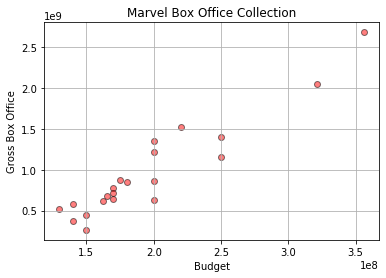

In [107]:
y=profit_df["Collection"]
x=profit_df["Budget"]
plt.scatter(x, y, c='r', alpha=0.5,edgecolor="black")
plt.title('Marvel Box Office Collection')
plt.xlabel('Budget')
plt.ylabel('Gross Box Office')

plt.grid()
plt.savefig("images/scatterplot")
plt.show()

In [101]:
y_axis=profit_df["Collection"]
x_axis=profit_df["Budget"]
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)

fit = slope * x_axis + intercept
(slope,intercept)

(9.527558084365658, -897051381.4673729)

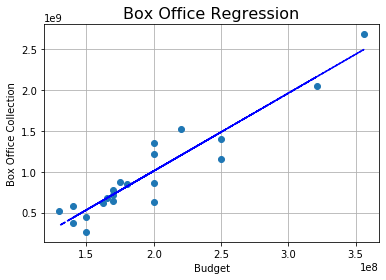

In [108]:
plt.title("Box Office Regression", fontsize=16)


plt.xlabel("Budget")
plt.ylabel("Box Office Collection")

plt.plot(x_axis, y_axis, linewidth=0, marker='o')
plt.plot(x_axis, fit, 'b--')



plt.grid()
plt.savefig("images/linearregression")

In [33]:
model_df=combined_df[["Movie ID","Collection","Budget"]]

model_df.set_index("Movie ID")

,Collection,Budget
Movie ID,,
Iron Man 2,"$623,933,331,","$200,000,000"
Guardians of the Galaxy,"$774,176,600","$170,000,000"
Black Panther,"$1,347,071,259","$200,000,000"
Iron Man 3,"$1,215,439,994","$200,000,000"
The Incredible Hulk,"$263,427,551","$150,000,000"
Captain Marvel,"$1,126,318,317,",NaN
Iron Man,"$585,174,222,","$140,000,000"
Thor,"$449,326,618","$150,000,000"
Captain America: Civil War,"$1,153,304,495","$250,000,000"


In [120]:
marvel_df=combined_df[["Movie ID","Phase","Collection","Budget","Release Date"]]

marvel_df

,Movie ID,Phase,Collection,Budget,Release Date
0,Iron Man 2,Phase One,"$623,933,331,","$200,000,000",7 May 2010 (USA)
1,Guardians of the Galaxy,Phase Two,"$774,176,600","$170,000,000",1 August 2014 (USA)
2,Black Panther,Phase Three,"$1,347,071,259","$200,000,000",16 February 2018 (USA)
3,Iron Man 3,Phase Two,"$1,215,439,994","$200,000,000",3 May 2013 (USA)
4,The Incredible Hulk,Phase One,"$263,427,551","$150,000,000",13 June 2008 (USA)
5,Captain Marvel,Phase Three,"$1,126,318,317,",NaN,8 March 2019 (USA)
6,Iron Man,Phase One,"$585,174,222,","$140,000,000",2 May 2008 (USA)
7,Thor,Phase One,"$449,326,618","$150,000,000",6 May 2011 (USA)
8,Captain America: Civil War,Phase Three,"$1,153,304,495","$250,000,000",6 May 2016 (USA)
9,Avengers: Infinity War,Phase Three,"$2,048,709,917","$321,000,000",27 April 2018 (USA)


In [93]:
movie_mvr=marvel_df[marvel_df['Phase']=='Phase One']

In [94]:
box_office=movie_mvr["Collection"]
budget=movie_mvr["Budget"]
x_axis=movie_mvr["Movie ID"]

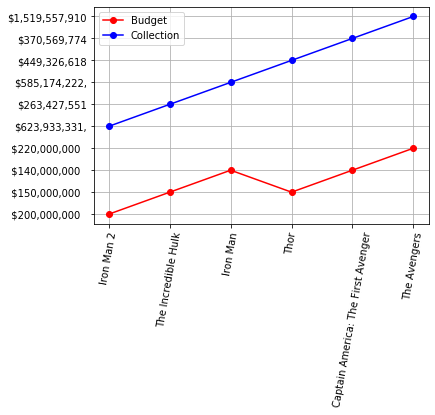

In [95]:
phase_one_budget,=plt.plot(x_axis,budget,color="red",label="Budget",marker='o')
phase_one, = plt.plot(x_axis, box_office, color="blue", label="Collection",marker='o' )
plt.legend(handles=[phase_one_budget, phase_one], loc="best")
plt.xticks(rotation=80)
plt.grid()

In [124]:
movie_mvr=marvel_df[marvel_df['Phase']=='Phase Two']
movie_mvr

,Movie ID,Phase,Collection,Budget,Release Date
1,Guardians of the Galaxy,Phase Two,"$774,176,600","$170,000,000",1 August 2014 (USA)
3,Iron Man 3,Phase Two,"$1,215,439,994","$200,000,000",3 May 2013 (USA)
14,Ant-Man,Phase Two,"$519,445,163","$130,000,000",17 July 2015 (USA)
15,Thor: The Dark World,Phase Two,"$644,783,140","$170,000,000",8 November 2013 (USA)
16,Captain America: The Winter Soldier,Phase Two,"$714,766,572","$170,000,000",4 April 2014 (USA)
17,Avengers: Age of Ultron,Phase Two,"$1,405,413,868","$250,000,000",1 May 2015 (USA)


In [125]:
box_office=movie_mvr["Collection"]
budget=movie_mvr["Budget"]
x_axis=movie_mvr["Movie ID"]

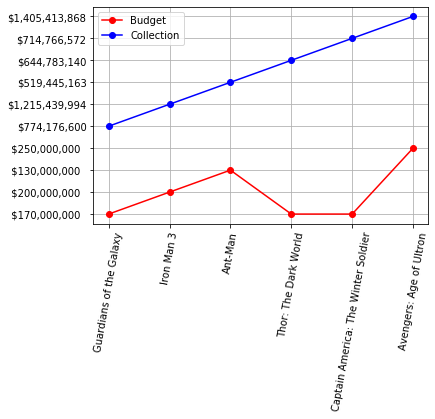

In [127]:
phase_one_budget,=plt.plot(x_axis,budget,color="red",label="Budget",marker='o')
phase_one, = plt.plot(x_axis, box_office, color="blue", label="Collection",marker='o' )
plt.legend(handles=[phase_one_budget, phase_one], loc="best")
plt.xticks(rotation=80)

plt.grid()

In [139]:
movie_mvr=marvel_df[marvel_df['Phase']=='Phase Three'].drop([5])
movie_mvr.sort_values(by=["Release Date"])

,Movie ID,Phase,Collection,Budget,Release Date
2,Black Panther,Phase Three,"$1,347,071,259","$200,000,000",16 February 2018 (USA)
12,Avengers: Endgame,Phase Three,"$2,681,988,528,","$356,000,000",26 April 2019 (USA)
9,Avengers: Infinity War,Phase Three,"$2,048,709,917","$321,000,000",27 April 2018 (USA)
19,Thor: Ragnarok,Phase Three,"$853,977,126","$180,000,000",3 November 2017 (USA)
20,Doctor Strange,Phase Three,"$677,718,395","$165,000,000",4 November 2016 (USA)
18,Guardians of the Galaxy Vol. 2,Phase Three,"$863,756,051","$200,000,000",5 May 2017 (USA)
13,Ant-Man and the Wasp,Phase Three,"$622,674,139","$162,000,000",6 July 2018 (USA)
8,Captain America: Civil War,Phase Three,"$1,153,304,495","$250,000,000",6 May 2016 (USA)
10,Spider-Man: Homecoming,Phase Three,"$880,166,924","$175,000,000",7 July 2017 (USA)


movie_mvr

In [153]:
movie_mvr=movie_mvr.rename(columns={'Release Date':'release_date'})
movie_mvr

,Movie ID,Phase,Collection,Budget,release_date
2,Black Panther,Phase Three,"$1,347,071,259","$200,000,000",16 February 2018 (USA)
8,Captain America: Civil War,Phase Three,"$1,153,304,495","$250,000,000",6 May 2016 (USA)
9,Avengers: Infinity War,Phase Three,"$2,048,709,917","$321,000,000",27 April 2018 (USA)
10,Spider-Man: Homecoming,Phase Three,"$880,166,924","$175,000,000",7 July 2017 (USA)
12,Avengers: Endgame,Phase Three,"$2,681,988,528,","$356,000,000",26 April 2019 (USA)
13,Ant-Man and the Wasp,Phase Three,"$622,674,139","$162,000,000",6 July 2018 (USA)
18,Guardians of the Galaxy Vol. 2,Phase Three,"$863,756,051","$200,000,000",5 May 2017 (USA)
19,Thor: Ragnarok,Phase Three,"$853,977,126","$180,000,000",3 November 2017 (USA)
20,Doctor Strange,Phase Three,"$677,718,395","$165,000,000",4 November 2016 (USA)


In [154]:
movie_mvr=pd.concat([movie_mvr.drop('release_date', axis = 1), 
          (movie_mvr.release_date.str.split(" ").str[:3].apply(pd.Series)
          .rename(columns={0:'day', 1:'month', 2:'year',3:"country"}))], axis = 1)
movie_mvr

,Movie ID,Phase,Collection,Budget,day,month,year
2,Black Panther,Phase Three,"$1,347,071,259","$200,000,000",16,February,2018
8,Captain America: Civil War,Phase Three,"$1,153,304,495","$250,000,000",6,May,2016
9,Avengers: Infinity War,Phase Three,"$2,048,709,917","$321,000,000",27,April,2018
10,Spider-Man: Homecoming,Phase Three,"$880,166,924","$175,000,000",7,July,2017
12,Avengers: Endgame,Phase Three,"$2,681,988,528,","$356,000,000",26,April,2019
13,Ant-Man and the Wasp,Phase Three,"$622,674,139","$162,000,000",6,July,2018
18,Guardians of the Galaxy Vol. 2,Phase Three,"$863,756,051","$200,000,000",5,May,2017
19,Thor: Ragnarok,Phase Three,"$853,977,126","$180,000,000",3,November,2017
20,Doctor Strange,Phase Three,"$677,718,395","$165,000,000",4,November,2016


In [160]:
movie_mvr=movie_mvr.sort_values(by=["year"])

In [161]:
box_office=movie_mvr["Collection"]
budget=movie_mvr["Budget"]
x_axis=movie_mvr["Movie ID"]

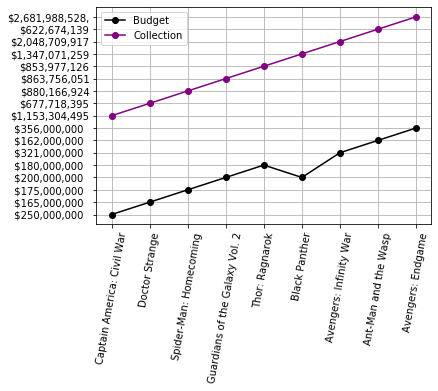

In [162]:

phase_one_budget,=plt.plot(x_axis,budget,color="black",label="Budget",marker='o')
phase_one, = plt.plot(x_axis, box_office, color="purple", label="Collection",marker='o' )
plt.legend(handles=[phase_one_budget, phase_one], loc="best")
plt.xticks(rotation=80)
plt.grid()
